<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/ml14_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  # 비지도 학습 clustering 알고리즘
from sklearn.decomposition import PCA  # 주성분 분석, 비지도 학습

# Fruit datasets

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# !linux명령어
# wget 파일저장위치(URL) -O 파일이름: URL에서 데이터를 다운로드해서 파일에 저장.

--2022-06-29 04:57:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-29 04:57:02--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-29 04:57:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

npy 파일: numpy의 배열을 저장한 파일 타입
*   `np.save(file, arr)`: 배열 arr을 파일 file에 npy 포맷으로 저장.
*   `np.load(file)`: npy 포맷으로 저장된 파일을 읽어서 배열을 복원.

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
fruits.shape  # (n_samples, height, width)

(300, 100, 100)

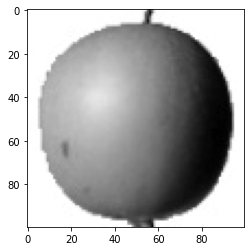

In [ ]:
# 첫번째 이미지 시각화
img = fruits[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

10x10 subplot을 생성해서 이미지 100개 씩 시각화

In [ ]:
def plot_fruits(arr, n_rows=10, n_cols=10, start=0):
    # n_rows x n_cols 개수의 subplot들을 생성
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
    for i in range(n_rows):
        for j in range(n_cols):
            img = arr[start + i * n_cols + j]  # subplot에 그릴 이미지
            ax[i, j].imshow(img, cmap=plt.cm.binary)
            ax[i, j].axis('off')
    plt.show()

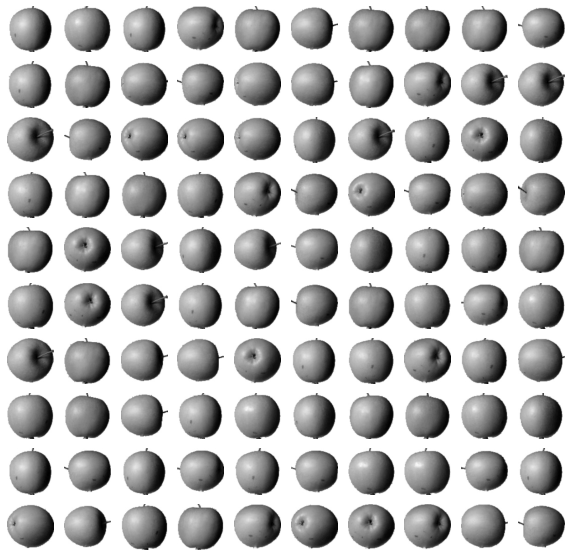

In [ ]:
plot_fruits(fruits)

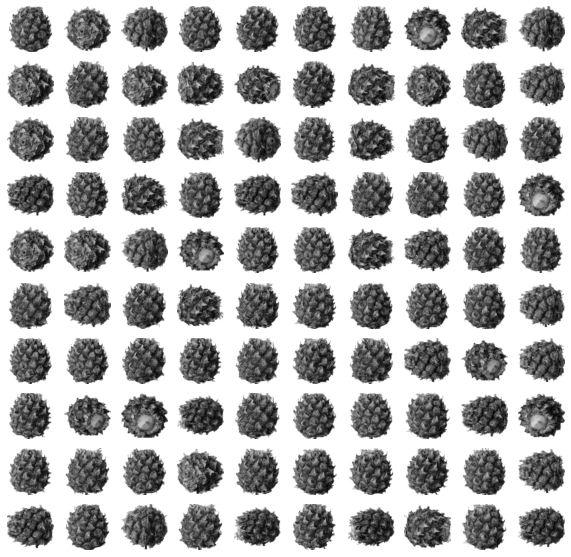

In [ ]:
plot_fruits(fruits, start=100)

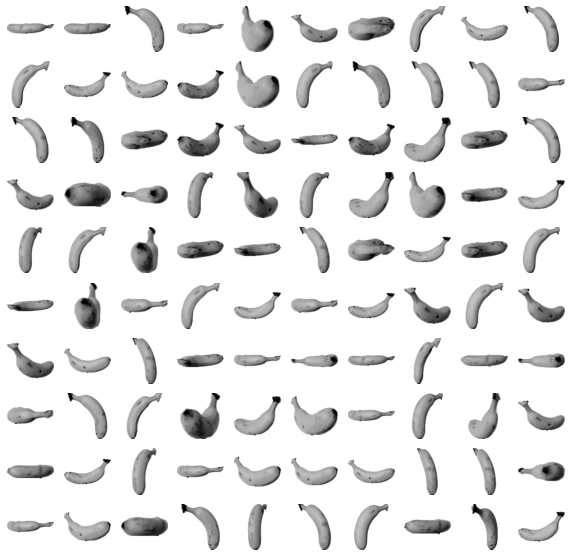

In [ ]:
plot_fruits(fruits, start=200)

# Pixel 분석

In [ ]:
# (300, 100, 100) shape의 3차원 배열을 (300, 100*100) shape의 2차원 배열로 변환
apple = fruits[:100, :, :].reshape((100, -1))  # (100, 100*100)
pineapple = fruits[100:200, :, :].reshape((100, -1))
banana = fruits[200:, :, :].reshape((100, -1))

In [ ]:
apple.shape, pineapple.shape, banana.shape
# shape: (n_samples, n_pixels)

((100, 10000), (100, 10000), (100, 10000))

## 각 샘플(각각의 과일)에서 픽셀들의 평균값

In [ ]:
apple_mean = np.mean(apple, axis=1)
apple_mean

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [ ]:
pineapple_mean = np.mean(pineapple, axis=1)
banana_mean = np.mean(banana, axis=1)

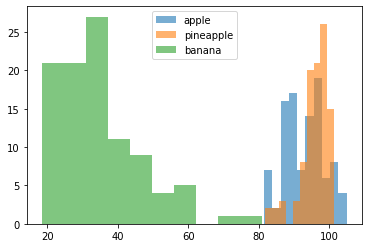

In [ ]:
# 과일의 픽셀 평균값의 분포 - 히스토그램
plt.hist(apple_mean, alpha=0.6, label='apple')
plt.hist(pineapple_mean, alpha=0.6, label='pineapple')
plt.hist(banana_mean, alpha=0.6, label='banana')
plt.legend()
plt.show()

## 각 픽셀 별로 평균 분석

In [ ]:
apple_px_mean = np.mean(apple, axis=0)
pineapple_px_mean = np.mean(pineapple, axis=0)
banana_px_mean = np.mean(banana, axis=0)

In [ ]:
apple_px_mean.shape, pineapple_px_mean.shape, banana_px_mean.shape

((10000,), (10000,), (10000,))

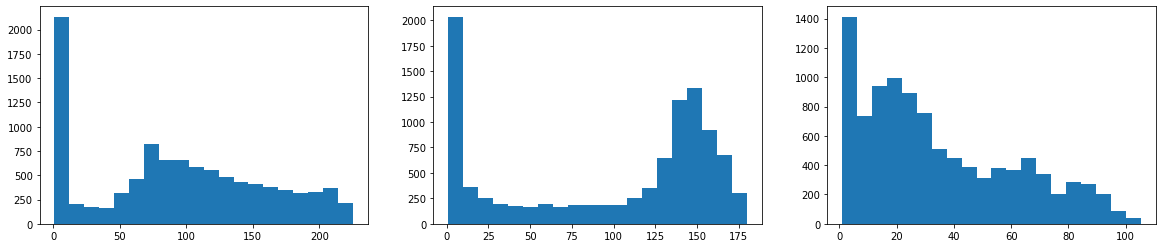

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
ax[0].hist(apple_px_mean, bins=20)
ax[1].hist(pineapple_px_mean, bins=20)
ax[2].hist(banana_px_mean, bins=20)

plt.show()

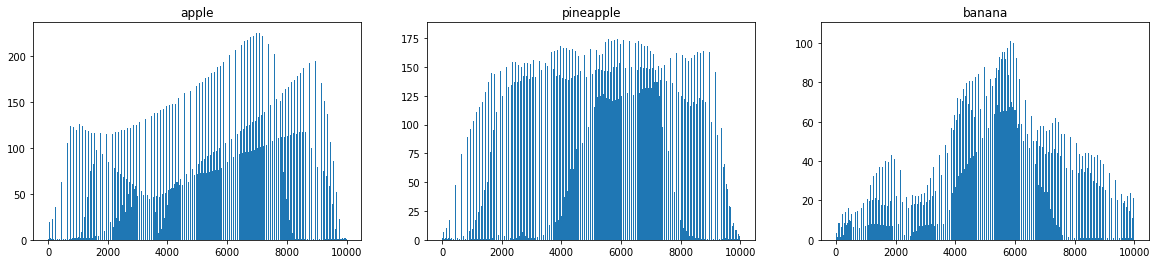

In [ ]:
# 각 픽셀 평균값의 크기를 막대 그래프로 표현
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
x_values = np.arange(100 * 100)  # 이미지 한 개에서 pixel의 개수
ax[0].bar(x_values, apple_px_mean)  # y축: 각 픽셀 별 평균값 10,000개
ax[0].set_title('apple')
ax[1].bar(x_values, pineapple_px_mean)
ax[1].set_title('pineapple')
ax[2].bar(x_values, banana_px_mean)
ax[2].set_title('banana')

plt.show()

각 픽셀들의 평균값 배열(shape: (10000,))을 (100, 100) shape의 2차원 배열로 변환해서 이미지로 그림.

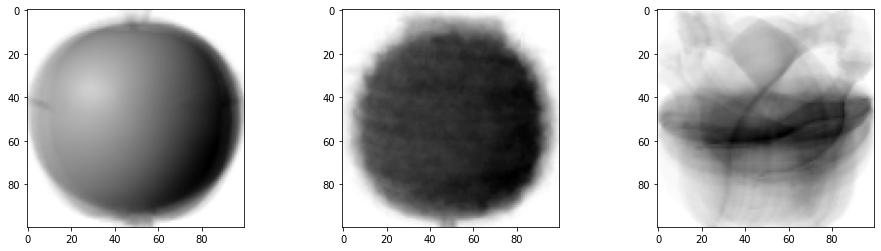

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
ax[0].imshow(apple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[1].imshow(pineapple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[2].imshow(banana_px_mean.reshape((100, 100)), cmap=plt.cm.binary)

plt.show()

## 픽셀들의 평균값과 가까운 이미지 찾기

*   diff = 실제 픽셀값 - 픽셀 평균값
*   diff의 절대값
*   diff 절대값들의 평균
*   diff 절대값 평균이 작은 순서로 선택

### 사과 픽셀 평균값과 가까운 이미지 찾기

In [ ]:
fruits_2d = fruits.reshape((300, -1))
fruits_2d.shape  # (n_samples, n_pixels)

(300, 10000)

In [ ]:
diff = fruits_2d - apple_px_mean  # 실젯값과 평균값의 차이
diff_abs = np.abs(diff)  # 차이들의 절대값
diff_abs_mean = np.mean(diff_abs, axis=1)  # 차이의 절대값들의 평균
diff_abs_mean  #> shape: (300,)

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [ ]:
# np.argsort(arr): 배열 arr을 (오름차순) 정렬한 인덱스를 리턴.
apple_like_idx = np.argsort(diff_abs_mean)
apple_like_idx[:100]

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

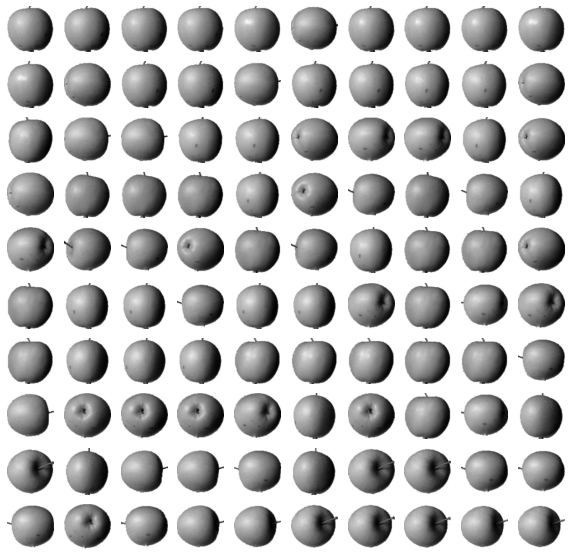

In [ ]:
apple_like = fruits[apple_like_idx]
plot_fruits(apple_like)

### 파인애플 픽셀 평균값과 가까운 이미지 찾기

In [ ]:
abs_diff = np.abs(fruits_2d - pineapple_px_mean)  # (실젯값 - 평균)의 절대값
mean_abs_diff = np.mean(abs_diff, axis=1)  # (실젯값 - 평균)의 절대값들의 평균
pineapple_like_idx = np.argsort(mean_abs_diff)  # 오름차순 정렬한 인덱스
pineapple_like_idx

array([111, 152, 164, 137, 136, 129, 166, 150, 165, 101, 174, 192, 117,
       140, 182, 184, 148, 181, 100, 193, 191, 120, 175, 162, 154, 157,
       155, 186, 121, 103, 122, 145, 138, 161, 118, 176, 160, 127, 144,
       156, 158, 105, 104, 102, 188, 124, 112, 198, 185, 177, 133, 125,
       131, 109, 180, 110, 106, 149, 115, 187, 163, 170, 141, 159, 183,
       142, 128, 195, 147, 167, 119, 189, 190, 151, 135, 169, 123, 171,
       143, 168, 107, 113, 108, 139, 130, 197, 134, 116, 199, 172,  77,
       179, 146, 178, 194, 114, 173, 196,  32,  46,  71, 126, 132, 153,
        29,  15,  69,  79,   7,  12,  98,  63,  39,  11,  35,  24,  25,
        90,  38,  72,   6,  23,  19,   5,  96,  51,  55,  36,  41,  26,
        10,  65,  43,  75,  82,  61,  95,  20,  99,  21,  89,  22,  80,
         2,  28,  56,  60,  64,  14,   0,  52,  53,  18,  73,  67,  62,
        30,  84,  13,  34,  66,  47,  91,  97,   4,  48,  70,  33,  57,
         1,  27,  59,  78,  49,  40,  87,  68,  93,  37,  76,  5

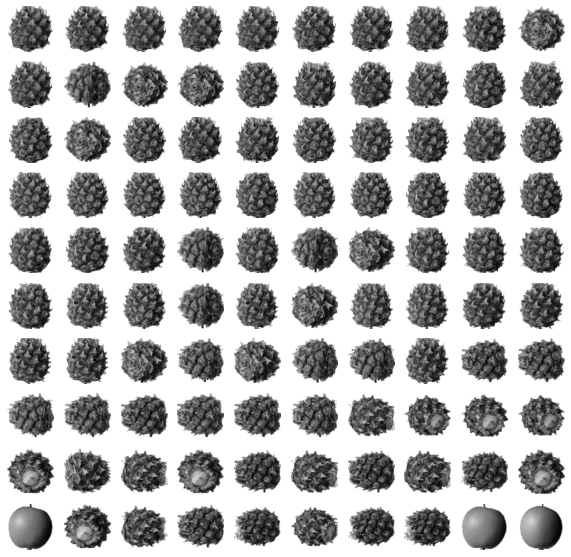

In [ ]:
plot_fruits(fruits[pineapple_like_idx])

### 바나나 픽셀 평균값과 가까운 이미지 찾기

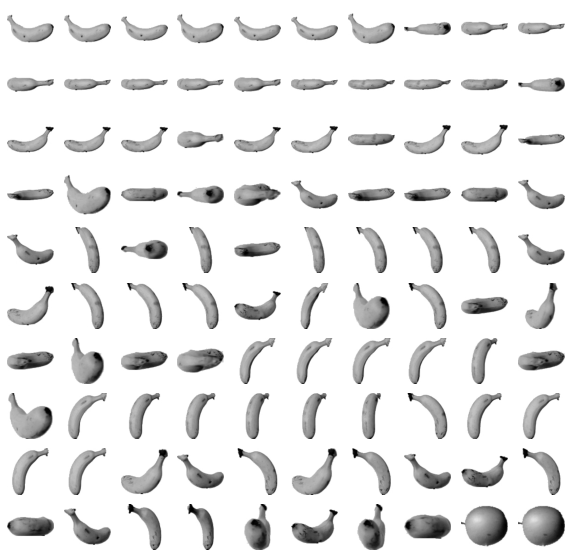

In [ ]:
abs_diff = np.abs(fruits_2d - banana_px_mean)
mean_abs_diff = np.mean(abs_diff, axis=1)
banana_like_idx = np.argsort(mean_abs_diff)
plot_fruits(fruits[banana_like_idx])

# K-Means Clustering(K-평균 군집화)

1. 무작위로 k개의 클러스터들의 중심을 설정.
1. 각 샘플에서 가장 가까운 클러스터의 중심을 찾아서 해당 클러스터의 샘플로 지정.
1. 각 클러스터에 속한 샘플들의 평균값으로 클러스터의 중심을 이동.
1. 2, 3번 과정을 클러스터의 중심의 변화가 없을 때까지 반복.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  #KMeans 객체 생성

In [ ]:
kmeans.fit(fruits_2d)  # 데이터(X)만 학습. 레이블(y) 없음. -> 비지도 학습

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.labels_  # KMeans가 3개(클러스터 개수)의 클래스들로 이루어진 레이블을 생성.

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [ ]:
kmeans.cluster_centers_  # KMeans가 찾은 클러스터들의 중심

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
kmeans.cluster_centers_.shape

(3, 10000)

KMeans가 찾은 각 레이블의 샘플들을 시각화

In [ ]:
def plot_cluster(arr):
    n = len(arr)  # 배열의 원소(샘플) 개수
    ncols = 10  # 한 줄(row)에 이미지를 10개씩 그림.
    nrows = int(np.ceil(n / ncols))  # subplot의 행의 개수
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j  # 배열 arr의 인덱스
            if idx < n:  # 인덱스가 샘플 개수보다 크면 안되기 때문에!
                # (10000,) shape의 1차원 배열을 (100, 100) shape으로 변환 -> 이미지로 그림.
                img = arr[idx].reshape((100, 100))
                ax[i, j].imshow(img, cmap=plt.cm.binary)
            ax[i, j].axis('off')
    plt.show()

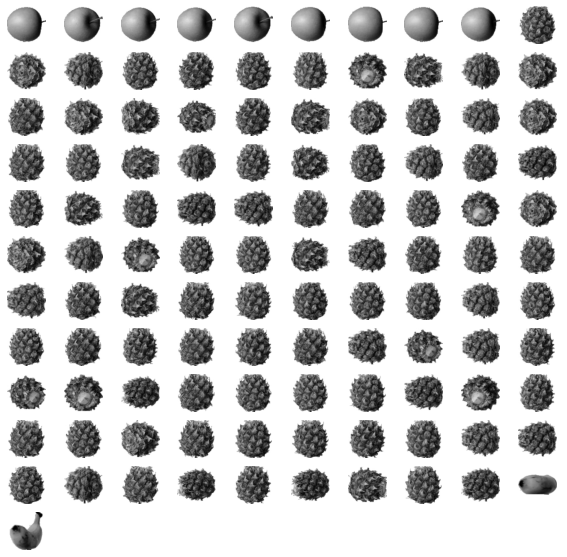

In [ ]:
plot_cluster(fruits_2d[kmeans.labels_ == 0])

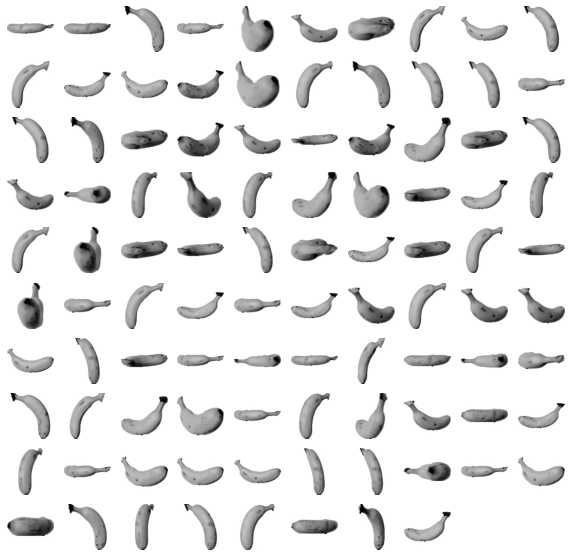

In [ ]:
plot_cluster(fruits_2d[kmeans.labels_ == 1])

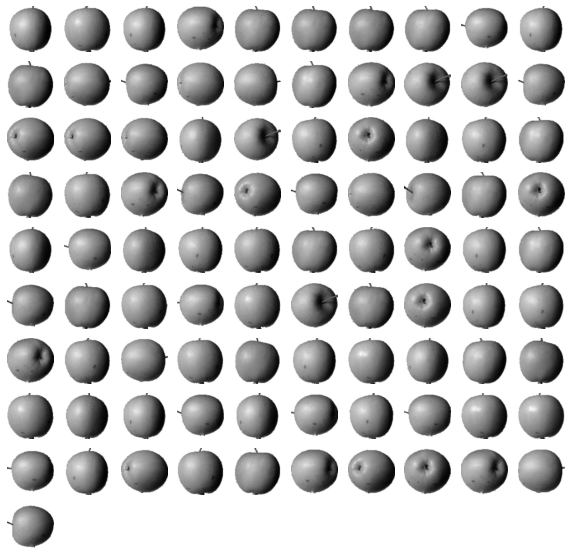

In [ ]:
plot_cluster(fruits_2d[kmeans.labels_ == 2])

## KMean가 찾은 `cluster_centers_`: 클러스터들의 중심(centroid)

In [ ]:
kmeans.cluster_centers_  # shape: (3, 10000)

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ]])

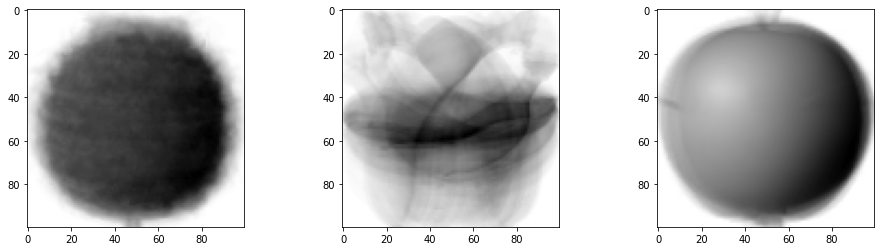

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
for i, centroid in enumerate(kmeans.cluster_centers_):
    img = centroid.reshape((100, 100))  # (10000,) 1차원 배열을 2차원 배열로 변환
    ax[i].imshow(img, cmap=plt.cm.binary)

plt.show()

## 훈련 샘플에서 클러스터들의 중심까지의 거리 계산

In [ ]:
distances = kmeans.transform(fruits_2d)

In [ ]:
distances.shape  # (n_samples, n_clusters)
# 각 샘플에서 클러스터 중심들까지의 거리

(300, 3)

In [ ]:
distances[:6]

array([[4677.10527943, 8642.61845541, 3087.33092099],
       [5363.9344124 , 9030.55531495, 2641.34592861],
       [4637.76848934, 8494.99543011, 3122.48819955],
       [5319.2368841 , 9132.8299753 , 3032.41637343],
       [5039.67898148, 8461.52728232, 2656.96823141],
       [4368.90682127, 7855.57817995, 4874.81067384]])

In [ ]:
labels = np.argmin(distances, axis=1)   # 3개의 클러스터 중심들까지의 거리들 중 최솟값
labels[:6]

array([2, 2, 2, 2, 2, 0])

In [ ]:
kmeans.predict(fruits_2d[:10])  # centroid들까지의 거리 계산하고 가장 짧은 거리의 인덱스를 리턴.

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

## 최적의 k값 찾기

__inertia__:

*   클러스터의 중심과 그 클러스터에 속한 샘플 사이의 거리들의 제곱의 합
*   클러스터에 속한 샘플들이 얼마나 가깝게 모여 있는 지를 나타내는 값
    *   inertia가 작으면, 샘플들이 클러스터 중심에서 가깝게 모여 있음.
    *   inertia가 크면, 샘플들이 클러스터 중심에서 멀리 퍼져 있음.
*   k 값(클러스터 개수)가 클 수록 inertia 작아짐.

In [ ]:
kmeans.inertia_  # k=3일 때 inertia

5074977316.088373

In [ ]:
# k 값을 2 ~ 7까지 변화시키면서 inertia를 계산하고 시각화
inertias = []
k_values = np.arange(2, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fruits_2d)
    inertias.append(kmeans.inertia_)

print(inertias)

[5856532545.983113, 5074977316.088373, 4673588404.856072, 4344167864.512113, 3997030130.9539833, 3776049057.608836]


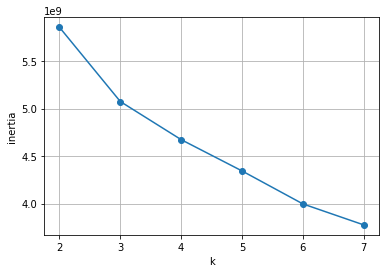

In [ ]:
plt.plot(k_values, inertias, 'o-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

*   k값을 증가시면 inertia는 계속 작아짐.
*   일반적으로 k값에 따라서 inertia가 기울기가 크게 줄어들다가, 기울기가 완만하게 줄어듦.
*   elbow: 기울기의 차이가 많이 생기는 부분
*   elbow의 위치가 최적의 k값.

# Exercise

*   iris 데이터 셋 사용
*   k=[2, 7) 값에 따른 inertia를 계산하고 시각화
*   k=3일 때, KMeans가 찾은 클러스터 중심을 출력하고, petal_length ~ petal_width만 시각화
*   k=3일 때, KMeans가 찾은 label과 실제 label을 비교

In [ ]:
from sklearn import datasets

In [ ]:
X, y = datasets.load_iris(return_X_y=True)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
inertias = []
k_values = np.arange(2, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

print(inertias)

[152.3479517603579, 78.851441426146, 57.22847321428572, 46.446182051282065, 39.03998724608726]


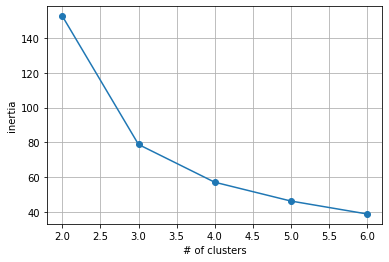

In [ ]:
plt.plot(k_values, inertias, 'o-')
plt.grid()
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
# k=3인 KMeans clustering:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

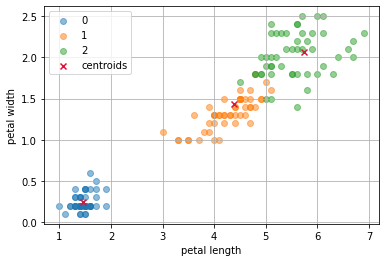

In [ ]:
for n in np.unique(y):
    plt.scatter(X[y == n, 2], X[y == n, 3], alpha=0.5, label=f'{n}')

petal_centroids = kmeans.cluster_centers_[:, 2:]
plt.scatter(petal_centroids[:, 0], petal_centroids[:, 1], 
            marker='x', color='crimson', label='centroids')

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid()
plt.show()

In [ ]:
print(y)  # 실제 레이블
print(np.unique(y, return_counts=True))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(array([0, 1, 2]), array([50, 50, 50]))


In [ ]:
print(kmeans.labels_)  # KMeans가 찾은 레이블
print(np.unique(kmeans.labels_, return_counts=True))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(array([0, 1, 2], dtype=int32), array([62, 50, 38]))


# PCA(Principal Component Analysis, 주성분 분석)

*   PCA 순서:
    *   훈련 셋에서 분산의 가장 많은 부분을 설명하는 축(axis)을 찾음.
    *   그 축에 수직(othogoanl)이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾음.
    *   이전의 두 축에 모두 수직이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾음.
    *   반복

*   설명된 분산 비율(explained variance ratio): 데이터 셋의 분산이 각 주성분 축에 따라 놓여 있는 비율.
*   PCA는 주성분의 개수 또는 설명된 분산 비율을 설정해서 데이터 셋의 차원을 축소하는 사용.

In [ ]:
fruits.shape  # (n_samples, height, width)

(300, 100, 100)

In [ ]:
fruits_2d.shape  # (n_samples, n_pixels=height*width)

(300, 10000)

In [ ]:
pca = PCA(n_components=50)  # 주성분(principal components) 50개를 찾는 PCA

In [ ]:
pca.fit(fruits_2d)  # 학습(훈련) - 주성분을 찾음

PCA(n_components=50)

In [ ]:
pca.components_.shape  # PCA가 찾은 50개 주성분 - (n_components, n_features)

(50, 10000)

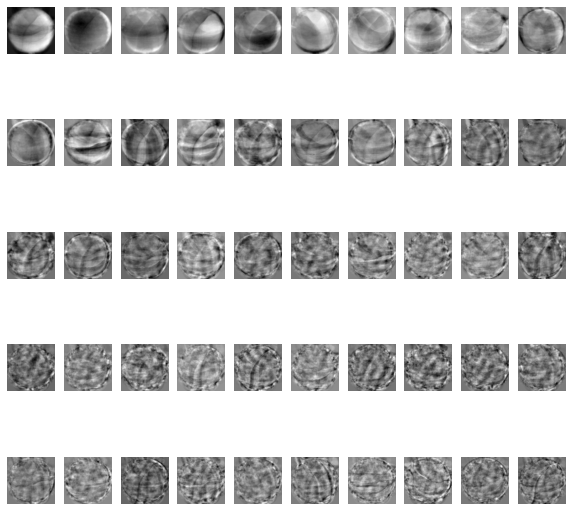

In [ ]:
plot_cluster(pca.components_)

## 차원 축소: `pca.transform(X)`

In [ ]:
fruits_2d_pca = pca.transform(fruits_2d)

In [ ]:
fruits_2d_pca.shape  # (n_samples, n_components)

(300, 50)

## 차원 재구성: `pca.inverse_transform(X)`

In [ ]:
fruits_2d_inv = pca.inverse_transform(fruits_2d_pca)

In [ ]:
fruits_2d_inv.shape  # (n_samples, n_features)

(300, 10000)

원본 이미지와 차원이 재구성된 이미지 비교

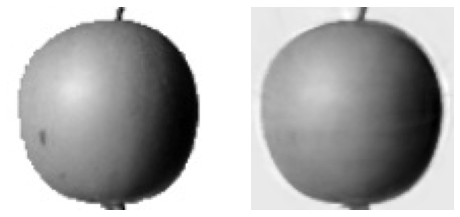

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
# 원본 이미지
ax[0].imshow(fruits[0], cmap=plt.cm.binary)
ax[0].axis('off')
# PCA 차원 축소 후 재구성된 이미지
img_inv = fruits_2d_inv[0].reshape((100, 100))  # (10000,) -> (100, 100)
ax[1].imshow(img_inv, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

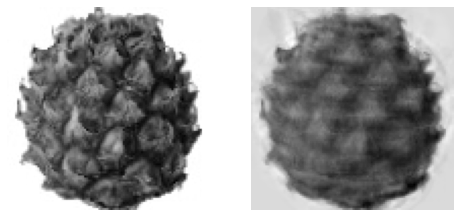

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
# 원본 이미지
ax[0].imshow(fruits[100], cmap=plt.cm.binary)
ax[0].axis('off')
# PCA 차원 축소 후 재구성된 이미지
img_inv = fruits_2d_inv[100].reshape((100, 100))  # (10000,) -> (100, 100)
ax[1].imshow(img_inv, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

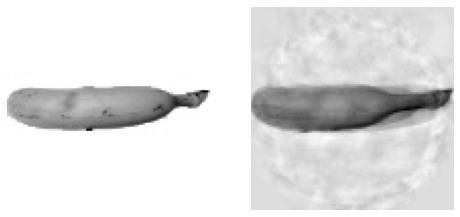

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
# 원본 이미지
ax[0].imshow(fruits[200], cmap=plt.cm.binary)
ax[0].axis('off')
# PCA 차원 축소 후 재구성된 이미지
img_inv = fruits_2d_inv[200].reshape((100, 100))  # (10000,) -> (100, 100)
ax[1].imshow(img_inv, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

## 설명된 분산(explained variance)

In [ ]:
pca.explained_variance_.shape  # (n_componts,)

(50,)

In [ ]:
pca.explained_variance_

array([13825250.21582   ,  3244970.17261193,  2147002.11072804,
        1315766.76701663,  1115261.57182809,  1071019.42512462,
         839909.33515026,   670735.97207649,   447908.41089938,
         438278.50237769,   376058.33816862,   308314.26718889,
         286653.15329141,   276360.40744606,   226209.8896305 ,
         210588.27969284,   188950.41851886,   166855.26612695,
         158754.21783012,   156784.42648087,   146173.21601138,
         142739.02242772,   133181.45122353,   127123.2224843 ,
         121565.47613421,   117265.23401949,   108192.03867712,
         103738.98179064,    99244.29700123,    99116.08912572,
          94282.031761  ,    90037.55600538,    86446.03578538,
          83347.5586479 ,    82210.30175199,    80699.41762006,
          78159.55556417,    75217.8543163 ,    72371.89000108,
          70600.87756319,    69766.12797788,    63740.44815317,
          62785.67300071,    62029.66594857,    60378.0725593 ,
          59311.67554052,    55838.47776

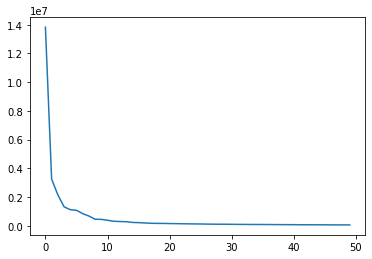

In [ ]:
plt.plot(pca.explained_variance_)
plt.show()

In [ ]:
cumsum_var = np.cumsum(pca.explained_variance_)  # cumulative sum(누적 합계)
cumsum_var

array([13825250.21582   , 17070220.38843193, 19217222.49915998,
       20532989.2661766 , 21648250.8380047 , 22719270.26312932,
       23559179.59827958, 24229915.57035606, 24677823.98125545,
       25116102.48363314, 25492160.82180175, 25800475.08899064,
       26087128.24228206, 26363488.64972812, 26589698.53935862,
       26800286.81905146, 26989237.23757032, 27156092.50369726,
       27314846.72152738, 27471631.14800825, 27617804.36401962,
       27760543.38644735, 27893724.83767088, 28020848.06015518,
       28142413.53628938, 28259678.77030887, 28367870.808986  ,
       28471609.79077664, 28570854.08777787, 28669970.17690359,
       28764252.20866459, 28854289.76466998, 28940735.80045536,
       29024083.35910326, 29106293.66085526, 29186993.07847532,
       29265152.63403948, 29340370.48835578, 29412742.37835686,
       29483343.25592005, 29553109.38389793, 29616849.8320511 ,
       29679635.50505181, 29741665.17100038, 29802043.24355967,
       29861354.91910019, 29917193.39686

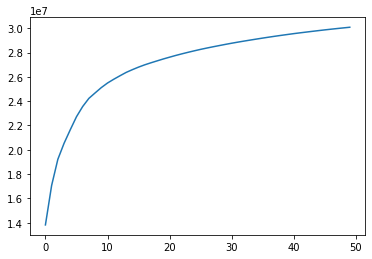

In [ ]:
plt.plot(cumsum_var)
plt.show()

## 설명된 분산 비율(explained variance ratio)

In [ ]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486382, 0.00480347,
       0.00447837, 0.00437316, 0.00408034, 0.00389473, 0.00372445,
       0.00359271, 0.00331473, 0.0031783 , 0.00304059, 0.00303666,
       0.00288856, 0.00275852, 0.00264848, 0.00255356, 0.00251871,
       0.00247242, 0.00239461, 0.00230448, 0.00221729, 0.00216303,
       0.00213746, 0.00195284, 0.00192359, 0.00190043, 0.00184983,
       0.00181716, 0.00171075, 0.00167874, 0.00161654, 0.001596  ])

In [ ]:
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cumsum_var_ratio

array([0.42357017, 0.52298772, 0.58876636, 0.62907807, 0.66324682,
       0.69606011, 0.72179277, 0.7423424 , 0.75606517, 0.76949289,
       0.78101436, 0.79046031, 0.79924263, 0.8077096 , 0.81464009,
       0.82109198, 0.82688093, 0.83199295, 0.83685677, 0.84166024,
       0.84613862, 0.85051177, 0.85459211, 0.85848684, 0.86221129,
       0.865804  , 0.86911873, 0.87229702, 0.87533761, 0.87837428,
       0.88126283, 0.88402135, 0.88666984, 0.88922339, 0.89174211,
       0.89421453, 0.89660914, 0.89891362, 0.90113091, 0.90329394,
       0.90543139, 0.90738424, 0.90930783, 0.91120826, 0.91305809,
       0.91487525, 0.91658599, 0.91826473, 0.91988127, 0.92147727])

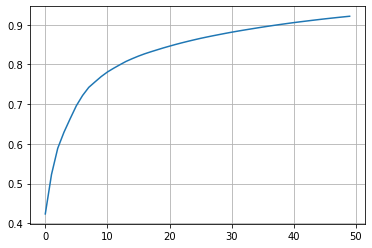

In [ ]:
plt.plot(cumsum_var_ratio)
plt.grid()
plt.show()

## 주성분 개수 선택

In [ ]:
pca = PCA()         # 주성분 분석 객체 생성
pca.fit(fruits_2d)  # 주성분 분석 수행
pca.components_.shape  # PCA가 찾은 주성분

(300, 10000)

In [ ]:
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cumsum_var_ratio[-10:]

array([0.99990994, 0.99992336, 0.9999362 , 0.99994888, 0.99996113,
       0.99997293, 0.99998405, 0.99999216, 1.        , 1.        ])

In [ ]:
d = np.argmax(cumsum_var_ratio >= 0.95)  # 설명된 분산 비율의 누적값이 95% 이상인 주성분 개수.
d

73

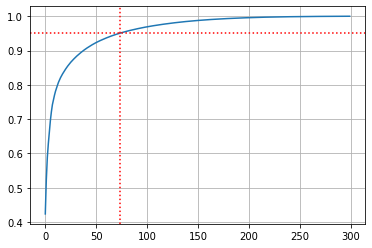

In [ ]:
plt.plot(cumsum_var_ratio)
plt.axhline(y=0.95, linestyle=':', color='red')
plt.axvline(x=d, linestyle=':', color='red')

plt.grid()
plt.show()

데이터 셋 전체 분산의 95%를 설명하는 주성분 분석

In [ ]:
# n_components: 정수(주성분 개수), 0 ~ 1 실수(주성분으로 설명되는 분산의 비율)
pca = PCA(n_components=0.95)
pca.fit(fruits_2d)
pca.components_.shape

(74, 10000)

In [ ]:
# 차원 축소
fruits_2d_pca = pca.transform(fruits_2d)
fruits_2d_pca.shape

(300, 74)

In [ ]:
# 복원
fruits_2d_inv = pca.inverse_transform(fruits_2d_pca)
fruits_2d_inv.shape

(300, 10000)

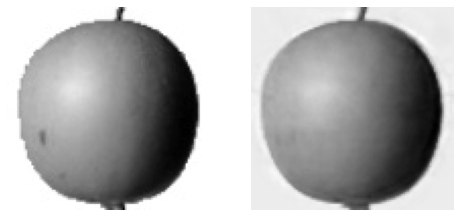

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].imshow(fruits[0], cmap=plt.cm.binary)
ax[0].axis('off')
img = fruits_2d_inv[0].reshape((100, 100))
ax[1].imshow(img, cmap=plt.cm.binary)
ax[1].axis('off')
plt.show()

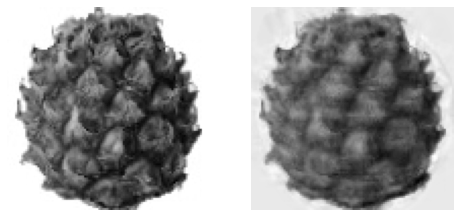

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].imshow(fruits[100], cmap=plt.cm.binary)
ax[0].axis('off')
img = fruits_2d_inv[100].reshape((100, 100))
ax[1].imshow(img, cmap=plt.cm.binary)
ax[1].axis('off')
plt.show()

## PCA 응용: 시각화

In [ ]:
pca = PCA(n_components=2)
# pca.fit(fruits_2d)
# fruits_2d_pca = pca.transform(fruits_2d)
fruits_2d_pca = pca.fit_transform(fruits_2d)
fruits_2d_pca.shape

(300, 2)

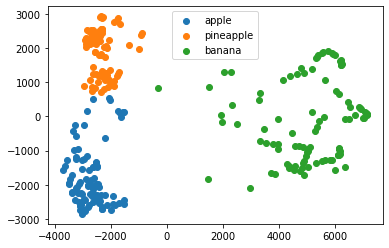

In [ ]:
plt.scatter(fruits_2d_pca[:100, 0], fruits_2d_pca[:100, 1], label='apple')
plt.scatter(fruits_2d_pca[100:200, 0], fruits_2d_pca[100:200, 1], label='pineapple')
plt.scatter(fruits_2d_pca[200:, 0], fruits_2d_pca[200:, 1], label='banana')

plt.legend()
plt.show()

MNIST 데이터 셋에서 주성분 2개를 찾고, 변환된 데이터들을 2차원 평면에 시각화.

In [ ]:
mnist = datasets.fetch_openml('mnist_784')

In [ ]:
X = mnist['data'].values.copy()
y = mnist['target'].values.copy()

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

In [ ]:
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

(70000, 2)

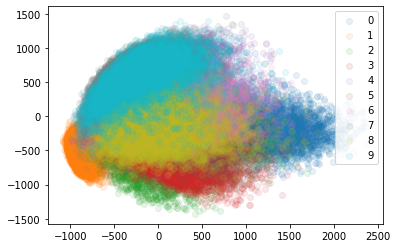

In [ ]:
for n in np.unique(y):
    plt.scatter(X_pca[y == n, 0], X_pca[y == n, 1], alpha=0.1, label=f'{n}')

plt.legend()
plt.show()

## PCA 응용: 전처리

In [ ]:
X = fruits_2d  # data
y = np.array([0] * 100 + [1] * 100 + [2] * 100)  # target

### PCA 사용 전

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression(random_state=42, n_jobs=-1)

In [ ]:
cv = cross_validate(estimator=logistic, X=X, y=y, n_jobs=-1, return_train_score=True)

In [ ]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [ ]:
np.mean(cv['fit_time'])

1.8543864250183106

In [ ]:
np.mean(cv['train_score'])

1.0

In [ ]:
np.mean(cv['test_score'])

0.9966666666666667

### PCA 적용 후

In [ ]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

In [ ]:
X.shape, X_pca.shape

((300, 10000), (300, 50))

In [ ]:
cv = cross_validate(estimator=LogisticRegression(random_state=42, n_jobs=-1),
                    X=X_pca, y=y, n_jobs=-1, return_train_score=True)

In [ ]:
np.mean(cv['fit_time'])

0.10604696273803711

In [ ]:
np.mean(cv['train_score'])

1.0

In [ ]:
np.mean(cv['test_score'])

1.0